# Analise Exploratoria de Dados

DataSet retirado do site: https://www.kaggle.com/datasets/surekharamireddy/credit-data

### Contexto

Um banco de varejo gostaria de contratá-lo para criar um modelo de inadimplência de crédito para o portfólio de cartões de crédito. O
banco espera que o modelo identifique os consumidores que provavelmente não pagam seus pagamentos com cartão de crédito
nos próximos 12 meses. Este modelo será usado para reduzir as perdas futuras do banco. O banco está disposto
para fornecer algumas amostras de dados que eles podem extrair atualmente de seus sistemas

### Resolução do problema

Muitas empresas passam pelo mesmo problema, querem liberar o crédito para um cliente novo. Mas como saber se esse cliente irá cumprir com o pagamento das parcelas ou ficar inadimplente com sua divida? trazendo dessa forma um prejuizo a empresa. So final dessa analise exploratória poderemos ver quais os clientes do DataSet que terão sua aprovação no crediário dessa loja. É uma analise simples, porém muito necessária.

### Observação sobre o DataSet

O siginifcado de cada coluna do DataSet está sendo explicado abaixo: <br>
    -1 **CARDHLDR**  Dummy variable, 1 if application for credit card accepted, 0 if not <br>
    -2 **DEFAULT** 1 if defaulted 0 if not (observed when CARDHLDR=1, 10,499 observations) <br>
    -3 **AGE**  Age in years plus twelfths of a year <br>
    -4 **ACADMOS** months living at current address <br>
    -5 **ADEPCNT** 1 + number of dependents <br>
    -6 **MAJORDRG** Number of major derogatory reports <br>
    -7 **MINORDRG** Number of minor derogatory reports <br>
    -8 **OWNRENT** 1 if owns their home, 0 if rent <br>
    -9 **INCOME** Monthly income (divided by 10,000) <br>
    -10 **SELFEMPL** 1 if self employed, 0 if not <br>
    -11 **INCPER** Income divided by number of dependents <br>
    -12 **EXP_INC** Ratio of monthly credit card expenditure to yearly income <br>
    -13 **SPENDING** Average monthly credit card expenditure (for CARDHOLDER = 1) <br>
    -14 **LOGSPEND** Log of spending

In [1]:
import pandas as pd
df = pd.read_csv("credit_data.csv")

In [2]:
%%time
df

CPU times: total: 0 ns
Wall time: 0 ns


,CARDHLDR,DEFAULT,AGE,ACADMOS,ADEPCNT,MAJORDRG,MINORDRG,OWNRENT,INCOME,SELFEMPL,INCPER,EXP_INC,SPENDING,LOGSPEND
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.000000,0.000667,,
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.000000,0.000222,,
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.000000,0.033270,121.9896773,4.8039364
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.000000,0.048427,96.8536213,4.5732008
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.000000,0.016523,48.1916700,3.8751862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13439,1,0,41.750000,12,1,0,0,0,2083.333333,1,12500.000000,0.047914,99.8216681,4.6033853
13440,1,0,48.500000,66,1,0,1,1,2583.333333,0,15500.000000,0.020469,52.8791657,3.9680094
13441,1,0,48.250000,2,2,0,0,1,3083.333333,0,12333.333008,0.111619,344.1574903,5.8410994
13442,1,0,24.833334,38,0,0,0,1,1416.666667,0,17000.000000,0.013096,18.5525005,2.9206046


In [7]:
df[df["AGE"] > 18 & df["ACADMOS"] > 10]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Data Cleaning

Inicialmente vamos limpar os dados, retirando celulas com valores nulos, e traduzindo os index de cada coluna

In [3]:
df.columns = ["POSSUI_CC", "PADRAO", "IDADE","MESES_RESID", "DEPENDENTES","DEPREC_MJOR", "DEPREC_MINOR", 
              "PSS_CASA", "RENDA_M", "EMPREGADO1_SELF0", "RENDA/DEPEND", "EXP_INC","DESPESA_MENSAL_CREDIT",
              "REGISTRO_GASTOS"]

In [4]:
df.head()

,POSSUI_CC,PADRAO,IDADE,MESES_RESID,DEPENDENTES,DEPREC_MJOR,DEPREC_MINOR,PSS_CASA,RENDA_M,EMPREGADO1_SELF0,RENDA/DEPEND,EXP_INC,DESPESA_MENSAL_CREDIT,REGISTRO_GASTOS
0,0,0,27.250000,4,0,0,0,0,1200.000000,0,18000.0,0.000667,,
1,0,0,40.833332,111,3,0,0,1,4000.000000,0,13500.0,0.000222,,
2,1,0,37.666668,54,3,0,0,1,3666.666667,0,11300.0,0.033270,121.9896773,4.8039364
3,1,0,42.500000,60,3,0,0,1,2000.000000,0,17250.0,0.048427,96.8536213,4.5732008
4,1,0,21.333334,8,0,0,0,0,2916.666667,0,35000.0,0.016523,48.1916700,3.8751862


### Quais serão aceitos??

Nessa ocasião só iremos aceitar os clientes que possui os seguintes requisitos: <br>
**1** - Já possui cartão de crédito <br>
**2** - Mais de 18 anos <br>
**3** - Pelo menos 6 meses morando na mesma residêcia <br>
**4** - Renda mensal acima de 3000 <br> 
**5** - Renda / Dependentes acima de 1000 <br>
**6** - Despensa Mensal no Cartão de crédito acima de 1000 <br>



Desse forma percebemos que não iremos usar algumas colunas, como as colunas Padrão, relatórios depreceativos(DEPREC MJOR e MINOR), EXP_INC e REGISTRO_GASTOS. 

In [5]:
df = df.drop(columns = ["REGISTRO_GASTOS", "DEPREC_MJOR", "DEPREC_MINOR",
                        "EMPREGADO1_SELF0",  "PADRAO", "REGISTRO_GASTOS", "EXP_INC",
                       "DEPENDENTES"])

In [6]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
0,0,27.250000,4,0,1200.000000,18000.000000,
1,0,40.833332,111,1,4000.000000,13500.000000,
2,1,37.666668,54,1,3666.666667,11300.000000,121.9896773
3,1,42.500000,60,1,2000.000000,17250.000000,96.8536213
4,1,21.333334,8,0,2916.666667,35000.000000,48.1916700
...,...,...,...,...,...,...,...
13439,1,41.750000,12,0,2083.333333,12500.000000,99.8216681
13440,1,48.500000,66,1,2583.333333,15500.000000,52.8791657
13441,1,48.250000,2,1,3083.333333,12333.333008,344.1574903
13442,1,24.833334,38,1,1416.666667,17000.000000,18.5525005


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13444 entries, 0 to 13443
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSSUI_CC              13444 non-null  int64  
 1   IDADE                  13444 non-null  float64
 2   MESES_RESID            13444 non-null  int64  
 3   PSS_CASA               13444 non-null  int64  
 4   RENDA_M                13444 non-null  float64
 5   RENDA/DEPEND           13444 non-null  float64
 6   DESPESA_MENSAL_CREDIT  13444 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 735.3+ KB


### Selecionando os clientes 

Como o primeiro critério é se possui cartão ou não, e isso implica em valores nulos em outras colunas, vamos começar por esssa seleção


In [8]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
0,0,27.250000,4,0,1200.000000,18000.000000,
1,0,40.833332,111,1,4000.000000,13500.000000,
2,1,37.666668,54,1,3666.666667,11300.000000,121.9896773
3,1,42.500000,60,1,2000.000000,17250.000000,96.8536213
4,1,21.333334,8,0,2916.666667,35000.000000,48.1916700
...,...,...,...,...,...,...,...
13439,1,41.750000,12,0,2083.333333,12500.000000,99.8216681
13440,1,48.500000,66,1,2583.333333,15500.000000,52.8791657
13441,1,48.250000,2,1,3083.333333,12333.333008,344.1574903
13442,1,24.833334,38,1,1416.666667,17000.000000,18.5525005


In [9]:
df = df[df.loc[:,"POSSUI_CC"] == 1] 

In [12]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
2,1,37.666668,54,1,3666.666667,11300.000000,121.9896773
3,1,42.500000,60,1,2000.000000,17250.000000,96.8536213
4,1,21.333334,8,0,2916.666667,35000.000000,48.1916700
5,1,20.833334,78,0,1750.000000,11750.000000,54.8159555
6,1,62.666668,25,1,5250.000000,36500.000000,206.1624667
...,...,...,...,...,...,...,...
13438,1,33.500000,24,0,1800.000000,21600.000000,38.6708323
13439,1,41.750000,12,0,2083.333333,12500.000000,99.8216681
13440,1,48.500000,66,1,2583.333333,15500.000000,52.8791657
13441,1,48.250000,2,1,3083.333333,12333.333008,344.1574903


DESPESA_MENSAL_CREDIT está com o type em object, para fazermos as seleções precisamos dessa coluna em float64 para isso:

In [13]:
df["DESPESA_MENSAL_CREDIT"] = df["DESPESA_MENSAL_CREDIT"].astype("float64")

C:\Users\carlo\AppData\Local\Temp\ipykernel_10364\4153018792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DESPESA_MENSAL_CREDIT"] = df["DESPESA_MENSAL_CREDIT"].astype("float64")


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10499 entries, 2 to 13442
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSSUI_CC              10499 non-null  int64  
 1   IDADE                  10499 non-null  float64
 2   MESES_RESID            10499 non-null  int64  
 3   PSS_CASA               10499 non-null  int64  
 4   RENDA_M                10499 non-null  float64
 5   RENDA/DEPEND           10499 non-null  float64
 6   DESPESA_MENSAL_CREDIT  10499 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 656.2 KB


Agora aplicando as outras seleções

In [15]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
2,1,37.666668,54,1,3666.666667,11300.000000,121.989677
3,1,42.500000,60,1,2000.000000,17250.000000,96.853621
4,1,21.333334,8,0,2916.666667,35000.000000,48.191670
5,1,20.833334,78,0,1750.000000,11750.000000,54.815956
6,1,62.666668,25,1,5250.000000,36500.000000,206.162467
...,...,...,...,...,...,...,...
13438,1,33.500000,24,0,1800.000000,21600.000000,38.670832
13439,1,41.750000,12,0,2083.333333,12500.000000,99.821668
13440,1,48.500000,66,1,2583.333333,15500.000000,52.879166
13441,1,48.250000,2,1,3083.333333,12333.333008,344.157490


In [16]:
df = df[
    (df["IDADE"] > 18) & 
    (df["MESES_RESID"] > 6) & 
    (df["RENDA_M"] > 3000) & 
    (df["RENDA/DEPEND"] > 1000) &
    (df["DESPESA_MENSAL_CREDIT"] > 1000)
  ]

In [17]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
228,1,40.500000,16,1,5912.000000,17736.000000,3049.900112
248,1,40.000000,74,1,4583.333333,11000.000000,1532.939983
401,1,38.916668,18,1,5000.000000,30000.000000,1137.184203
535,1,34.333332,12,0,4000.000000,12000.000000,1898.033261
703,1,30.083334,48,0,3583.333333,10750.000000,1081.096671
...,...,...,...,...,...,...,...
13005,1,41.083332,24,1,5000.000000,15000.000000,1463.826597
13016,1,45.166668,38,0,4441.666667,17766.666016,3687.525748
13097,1,39.416668,25,1,3541.666667,10625.000000,1070.403301
13370,1,39.666668,18,1,5633.333333,22533.333984,1425.639233


In [12]:
df

,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
228,1,40.500000,16,1,5912.000000,17736.000000,3049.900112
248,1,40.000000,74,1,4583.333333,11000.000000,1532.939983
401,1,38.916668,18,1,5000.000000,30000.000000,1137.184203
535,1,34.333332,12,0,4000.000000,12000.000000,1898.033261
703,1,30.083334,48,0,3583.333333,10750.000000,1081.096671
...,...,...,...,...,...,...,...
13005,1,41.083332,24,1,5000.000000,15000.000000,1463.826597
13016,1,45.166668,38,0,4441.666667,17766.666016,3687.525748
13097,1,39.416668,25,1,3541.666667,10625.000000,1070.403301
13370,1,39.666668,18,1,5633.333333,22533.333984,1425.639233


In [18]:
df["IDADE"] = df["IDADE"].astype(int)
df

C:\Users\carlo\AppData\Local\Temp\ipykernel_10364\46241046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["IDADE"] = df["IDADE"].astype(int)


,POSSUI_CC,IDADE,MESES_RESID,PSS_CASA,RENDA_M,RENDA/DEPEND,DESPESA_MENSAL_CREDIT
228,1,40,16,1,5912.000000,17736.000000,3049.900112
248,1,40,74,1,4583.333333,11000.000000,1532.939983
401,1,38,18,1,5000.000000,30000.000000,1137.184203
535,1,34,12,0,4000.000000,12000.000000,1898.033261
703,1,30,48,0,3583.333333,10750.000000,1081.096671
...,...,...,...,...,...,...,...
13005,1,41,24,1,5000.000000,15000.000000,1463.826597
13016,1,45,38,0,4441.666667,17766.666016,3687.525748
13097,1,39,25,1,3541.666667,10625.000000,1070.403301
13370,1,39,18,1,5633.333333,22533.333984,1425.639233


## Visualizando dados

Alguns tipos de vizualizações que podemos ser utilizadas

In [19]:
import matplotlib.pyplot as plt

<Axes: >

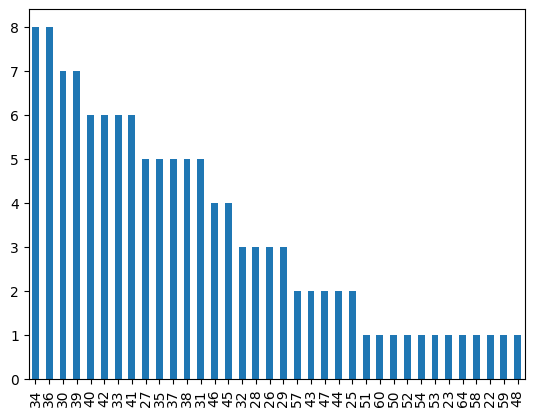

In [20]:
df['IDADE'].value_counts().plot.bar()

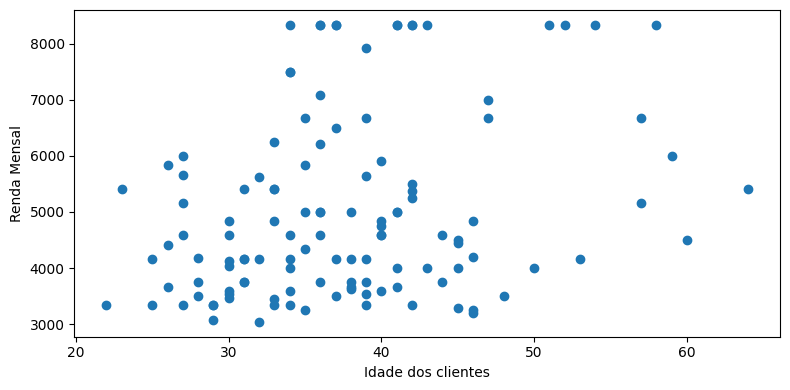

In [21]:
fig, ax = plt.subplots(figsize= (8,4))

ax.scatter(x='IDADE', y='RENDA_M', data=df)
ax.set_ylabel("Renda Mensal")
ax.set_xlabel("Idade dos clientes")
plt.tight_layout()

Text(0.5, 0, 'Despesa mensal Cartão de Crédito')

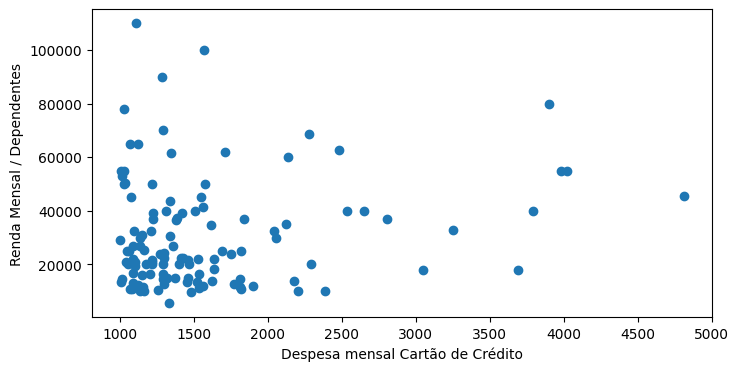

In [22]:
fig, ax = plt.subplots(figsize= (8,4))

ax.scatter(x= "DESPESA_MENSAL_CREDIT", y="RENDA/DEPEND", data=df)
ax.set_ylabel("Renda Mensal / Dependentes")
ax.set_xlabel("Despesa mensal Cartão de Crédito")

## Conclusão

Por fim ao final da Analise Exploratória chegamos aos clientes que teriam seu crediário aprovado que totalizam 121 clientes de 13444
que estavam disponivéis no inicio da analise, dessa forma essa mesma analise pode ser aplicada a tabelas que tenham número de telefone
ou CPF, em um caso real, poupando o trbalho da empresa no cadastro de clientes. <br> 

É uma analise simples, mas de grande relevância, que pode ser aplicadaa em diversos casos, e cada caso com seus devidos critérios.